In [ ]:
import pandas as pd

pad = "../../data/csv/"

df = pd.read_csv(pad+"fix_evidence.csv")

In [2]:
df

,Unnamed: 0,Image,Scene,ROI,Participant,FixDur,FixNr,Start,End,X,Y,Name,NextROI,experience,Evidence,Movable,ExitEntry
0,0,1,1,0,2.0,103.0,1.0,7.0,109.0,510.9,381.0,Back_wall,Bottle_on_table,Control,No,No,No
1,1,1,1,22,2.0,77.0,2.0,236.0,312.0,450.8,307.0,Curtains,Floor,Control,No,No,No
2,2,1,1,9,2.0,300.0,3.0,347.0,646.0,414.5,447.9,Back_chair,Body,Control,No,No,No
3,3,1,1,8,2.0,165.0,4.0,687.0,851.0,468.6,619.1,Floor,Elsewhere,Control,No,No,No
4,4,1,1,0,2.0,461.0,5.0,876.0,1336.0,465.4,687.9,Body,Elsewhere,Control,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30187,30187,2,3,7,9008.0,243.0,71.0,25535.0,25777.0,307.6,524.2,Table,NaN,Control,No,No,No
30188,30188,2,3,13,9008.0,274.0,72.0,25829.0,26102.0,530.8,385.8,Right_plate,NaN,Control,Yes,Yes,No
30189,30189,2,3,14,9008.0,374.0,73.0,26136.0,26509.0,623.9,466.2,Right_fork,NaN,Control,Yes,Yes,No
30190,30190,2,3,7,9008.0,170.0,74.0,26578.0,26747.0,305.1,542.6,Table,NaN,Control,No,No,No


In [3]:
def time_to_find_evidence(group):
    # Find first fixation where Evidence is True (or any marker indicating found)
    evidence_found = group[group['Evidence'] == 'Yes']
    
    if evidence_found.empty:
        # No evidence found for this group
        return pd.Series({
            'FixNr_to_find': pd.NA,
            'Accum_FixDur_to_find': pd.NA
        })
    else:
        # Get the first fixation number where evidence was found
        first_fixnr = evidence_found['FixNr'].min()
        
        # Select all fixations up to and including that fixation
        fixations_until_found = group[group['FixNr'] <= first_fixnr]
        
        # Sum the FixDur up to that fixation
        acc_fixdur = fixations_until_found['FixDur'].sum()
        
        return pd.Series({
            'FixNr_to_find': first_fixnr,
            'Accum_FixDur_to_find': acc_fixdur
        })

# Group by the required columns
result = df.groupby(['Image', 'Scene', 'Participant', 'experience']).apply(time_to_find_evidence).reset_index()

print(result)

     Image  Scene  Participant experience  FixNr_to_find  Accum_FixDur_to_find
0        1      1          2.0    Control            5.0                1106.0
1        1      1          4.0  FirstYear            3.0                 697.0
2        1      1          7.0    Control            4.0                1026.0
3        1      1         11.0  ThirdYear            6.0                 821.0
4        1      1         12.0  FirstYear            5.0                 893.0
..     ...    ...          ...        ...            ...                   ...
209      2      3       9002.0    Control            1.0                 260.0
210      2      3       9003.0    Control            2.0                 354.0
211      2      3       9004.0    Control            2.0                 472.0
212      2      3       9005.0    Control            1.0                 258.0
213      2      3       9008.0    Control            1.0                 336.0

[214 rows x 6 columns]


/tmp/ipykernel_2703214/1964023135.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['Image', 'Scene', 'Participant', 'experience']).apply(time_to_find_evidence).reset_index()


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `result` is your dataframe with columns:
# ['Image', 'Scene', 'Participant', 'experience', 'FixNr_to_find', 'Accum_FixDur_to_find']

# Aggregate mean and SEM per group for clearer plot:
summary = result.groupby(['experience', 'Scene', 'Image']).agg(
    mean_fixnr=('FixNr_to_find', 'mean'),
    sem_fixnr=('FixNr_to_find', 'sem'),
    mean_fixdur=('Accum_FixDur_to_find', 'mean'),
    sem_fixdur=('Accum_FixDur_to_find', 'sem')
).reset_index()

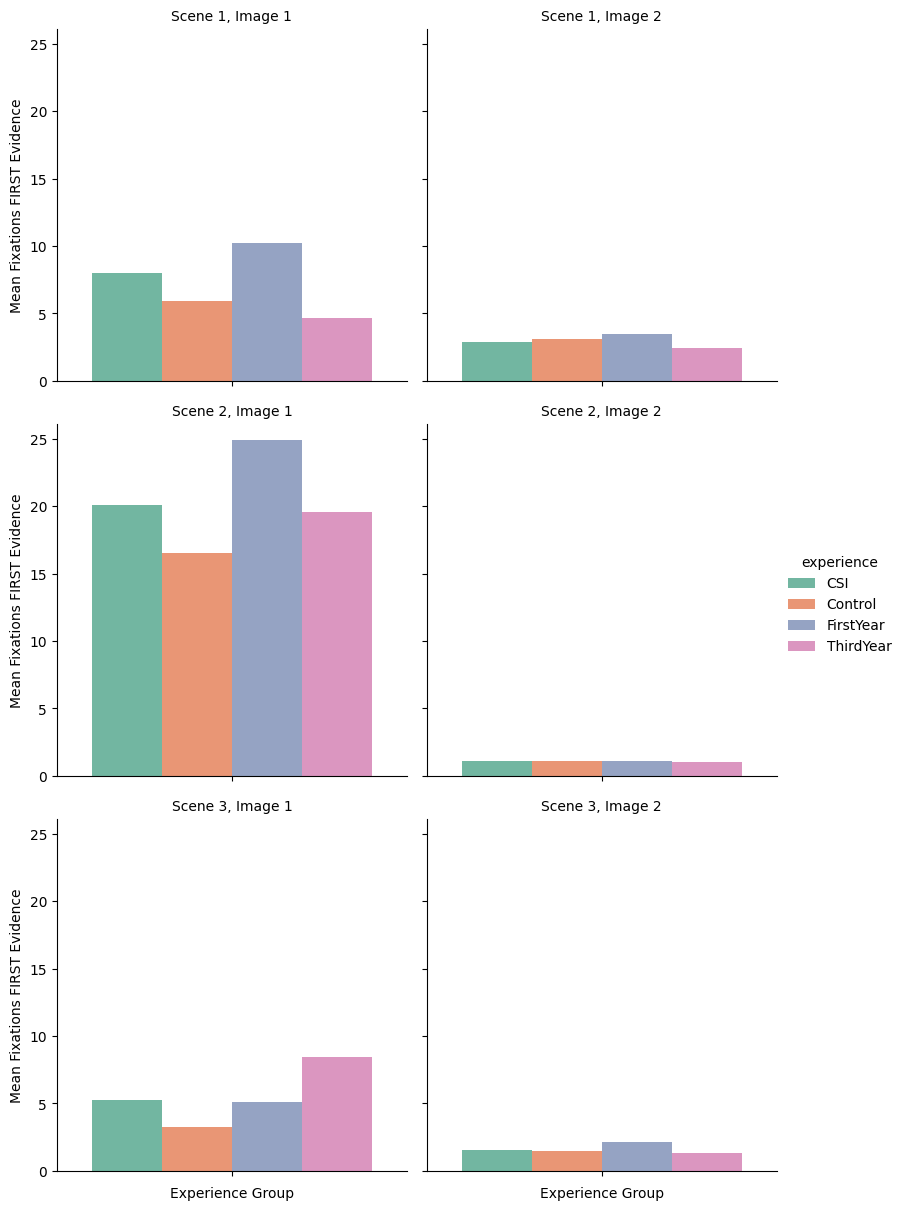

In [5]:
# Create the catplot with 3 rows (Scene), 2 columns (Image)
g = sns.catplot(
    data=summary,
    kind='bar',
    hue='experience',
    y='mean_fixnr',
    col='Image',
    row='Scene',
    errorbar=None,
    palette='Set2',
    height=4,
    aspect=1
)

g.set_axis_labels("Experience Group", "Mean Fixations FIRST Evidence")
g.set_titles("Scene {row_name}, Image {col_name}")
plt.show()


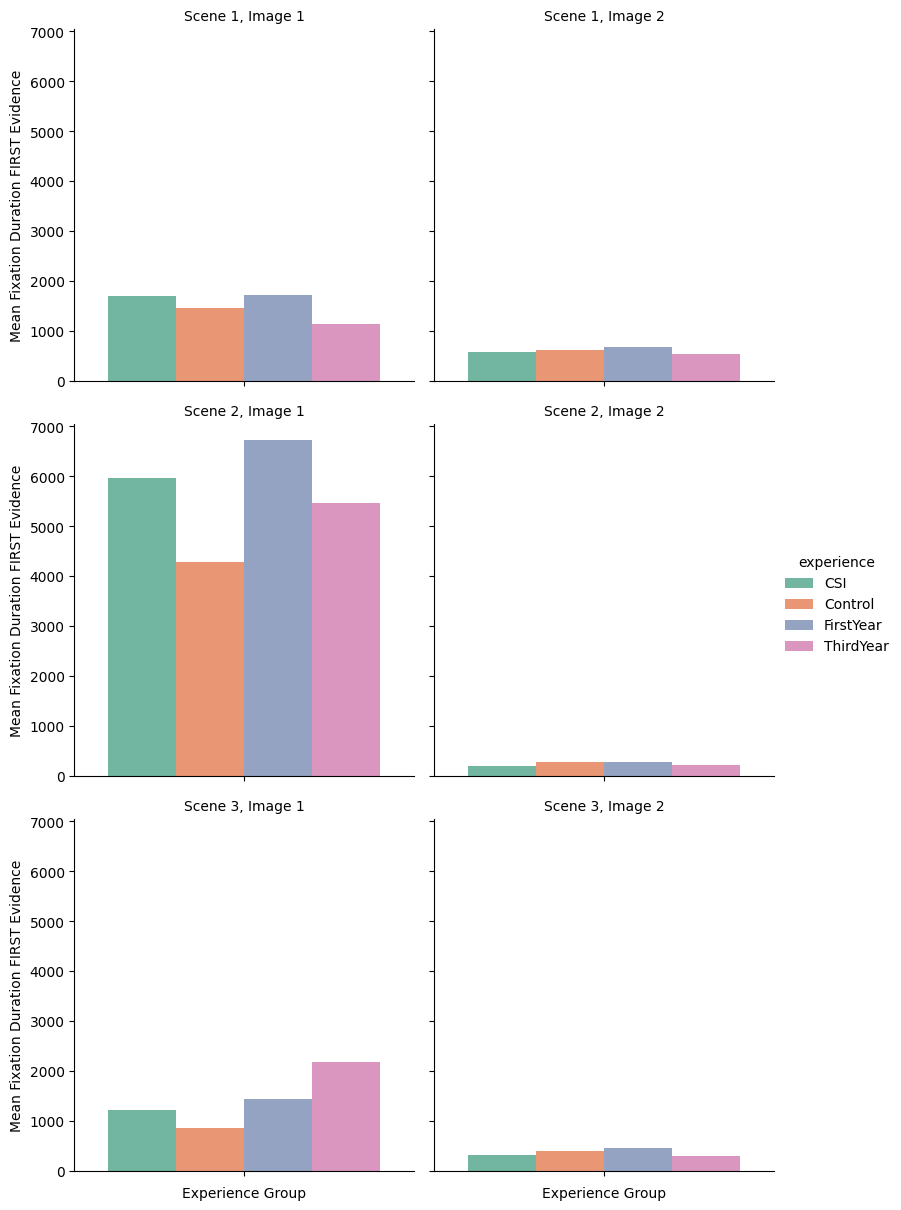

In [6]:
# Create the catplot with 3 rows (Scene), 2 columns (Image)
g = sns.catplot(
    data=summary,
    kind='bar',
    hue='experience',
    y='mean_fixdur',
    col='Image',
    row='Scene',
    errorbar=None,
    palette='Set2',
    height=4,
    aspect=1
)

g.set_axis_labels("Experience Group", "Mean Fixation Duration FIRST Evidence")
g.set_titles("Scene {row_name}, Image {col_name}")
plt.show()


In [7]:
def time_to_find_all_evidence(group):
    # Find all fixations where Evidence is True
    evidence_found = group[group['Evidence'] == 'Yes']
    
    if evidence_found.empty:
        # No evidence found for this group
        return pd.Series({
            'FixNr_to_find_all': pd.NA,
            'Accum_FixDur_to_find_all': pd.NA
        })
    else:
        # Get the fixation number of the last evidence found
        last_fixnr = evidence_found['FixNr'].max()
        
        # Select all fixations up to and including that fixation
        fixations_until_found_all = group[group['FixNr'] <= last_fixnr]
        
        # Sum the FixDur up to that fixation
        acc_fixdur_all = fixations_until_found_all['FixDur'].sum()
        
        return pd.Series({
            'FixNr_to_find_all': last_fixnr,
            'Accum_FixDur_to_find_all': acc_fixdur_all
        })

# Apply grouping and aggregation
result_all = df.groupby(['Image', 'Scene', 'Participant', 'experience']).apply(time_to_find_all_evidence).reset_index()


/tmp/ipykernel_2703214/2805118207.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_all = df.groupby(['Image', 'Scene', 'Participant', 'experience']).apply(time_to_find_all_evidence).reset_index()


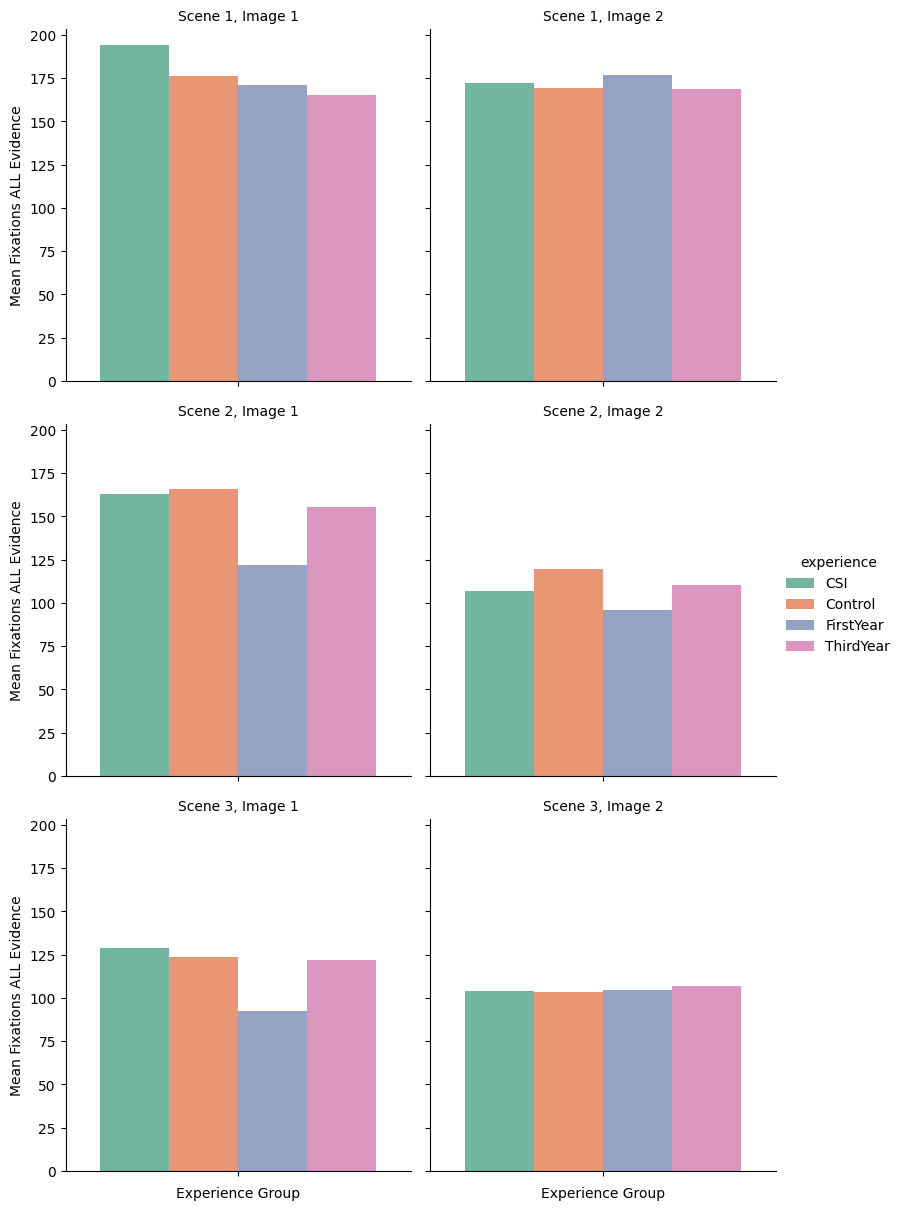

In [8]:
# Aggregate means and SEMs for plotting
summary_all = result_all.groupby(['experience', 'Scene', 'Image']).agg(
    mean_fixnr_all=('FixNr_to_find_all', 'mean'),
    sem_fixnr_all=('FixNr_to_find_all', 'sem'),
    mean_fixdur_all=('Accum_FixDur_to_find_all', 'mean'),
    sem_fixdur_all=('Accum_FixDur_to_find_all', 'sem')
).reset_index()

# Create the catplot with 3 rows (Scene), 2 columns (Image)
g = sns.catplot(
    data=summary_all,
    kind='bar',
    hue='experience',
    y='mean_fixnr_all',
    col='Image',
    row='Scene',
    errorbar=None,
    palette='Set2',
    height=4,
    aspect=1
)

g.set_axis_labels("Experience Group", "Mean Fixations ALL Evidence")
g.set_titles("Scene {row_name}, Image {col_name}")
plt.show()



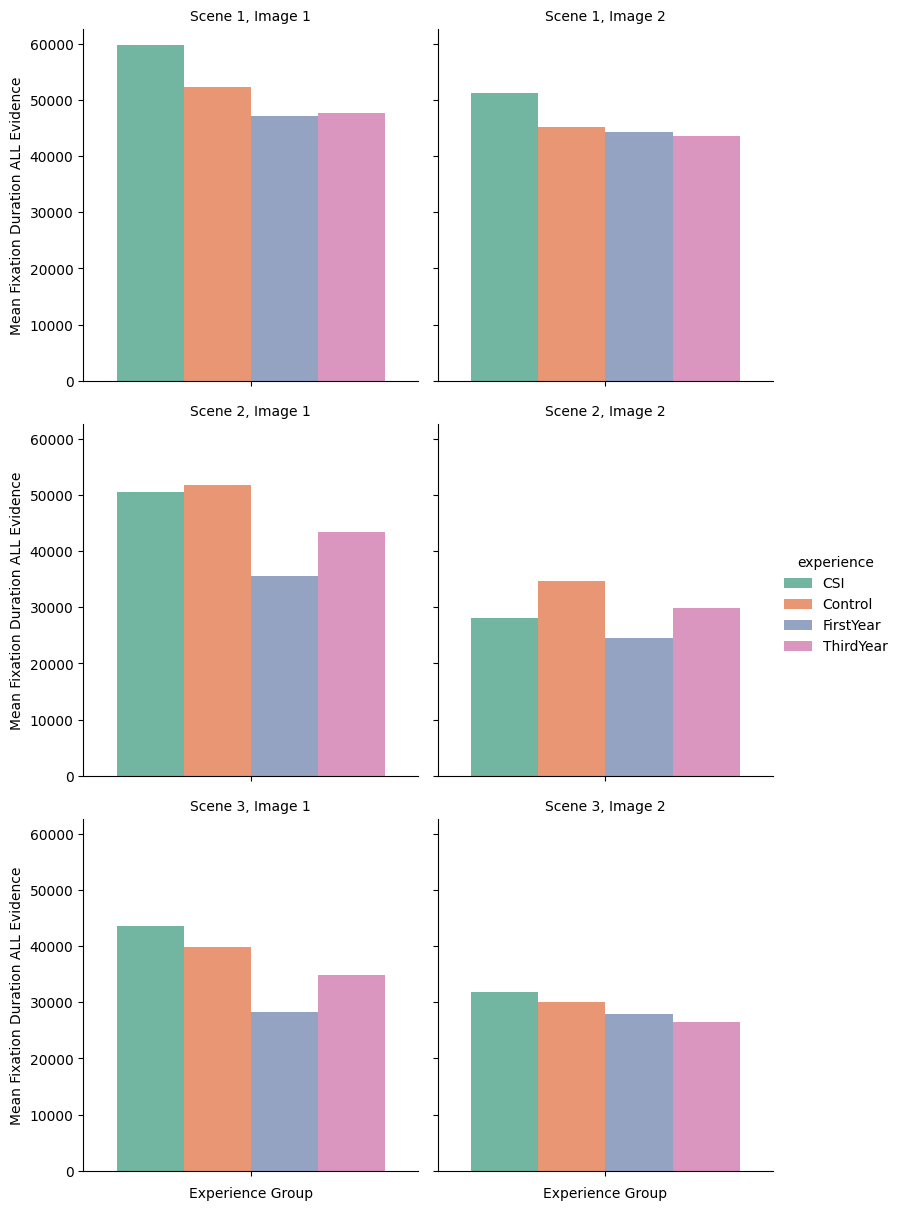

In [9]:
# Aggregate means and SEMs for plotting
summary_all = result_all.groupby(['experience', 'Scene', 'Image']).agg(
    mean_fixnr_all=('FixNr_to_find_all', 'mean'),
    sem_fixnr_all=('FixNr_to_find_all', 'sem'),
    mean_fixdur_all=('Accum_FixDur_to_find_all', 'mean'),
    sem_fixdur_all=('Accum_FixDur_to_find_all', 'sem')
).reset_index()

# Create the catplot with 3 rows (Scene), 2 columns (Image)
g = sns.catplot(
    data=summary_all,
    kind='bar',
    hue='experience',
    y='mean_fixdur_all',
    col='Image',
    row='Scene',
    errorbar=None,
    palette='Set2',
    height=4,
    aspect=1
)

g.set_axis_labels("Experience Group", "Mean Fixation Duration ALL Evidence")
g.set_titles("Scene {row_name}, Image {col_name}")
plt.show()



In [10]:
summary_all[(summary_all['Image'] == 1) & (summary_all['Scene'] == 1)]

,experience,Scene,Image,mean_fixnr_all,sem_fixnr_all,mean_fixdur_all,sem_fixdur_all
0,CSI,1,1,194.000000,27.186087,59678.666667,9223.826124
6,Control,1,1,176.000000,31.257888,52344.555556,10264.725896
12,FirstYear,1,1,170.875000,30.148701,47110.625000,8587.891430
18,ThirdYear,1,1,165.222222,21.178329,47593.444444,5917.353782


In [11]:
def find_non_body_before_after(group):
    group = group.copy()
    group['Name_clean'] = group['Name'].str.strip()
    
    prev_rois = []
    next_rois = []
    names = group['Name_clean'].values
    
    for i, roi in enumerate(names):
        if roi != 'Body':
            prev_rois.append(None)
            next_rois.append(None)
            continue
        
        # Find previous non-'Body'
        prev_roi = None
        for j in range(i-1, -1, -1):
            if names[j] != 'Body':
                prev_roi = names[j]
                break
        
        # Find next non-'Body'
        next_roi = None
        for k in range(i+1, len(names)):
            if names[k] != 'Body':
                next_roi = names[k]
                break
        
        prev_rois.append(prev_roi)
        next_rois.append(next_roi)
    
    group['prev_roi'] = prev_rois
    group['next_roi'] = next_rois
    
    # Filter to rows where ROI is Body
    return group[group['Name_clean'] == 'Body'][['Participant', 'experience', 'Scene', 'Image', 'FixNr', 'prev_roi', 'next_roi']]
rois_around_body = df.groupby(['Participant', 'experience', 'Scene', 'Image']).apply(find_non_body_before_after).reset_index(drop=True)

print(rois_around_body.head())


   Participant experience  Scene  Image  FixNr     prev_roi     next_roi
0          2.0    Control      1      1    5.0        Floor        Table
1          2.0    Control      1      1    9.0        Floor        Floor
2          2.0    Control      1      1   26.0        Floor        Floor
3          2.0    Control      1      1   27.0        Floor        Floor
4          2.0    Control      1      1   66.0  Chair_right  Wooden_wall


/tmp/ipykernel_2703214/699663084.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rois_around_body = df.groupby(['Participant', 'experience', 'Scene', 'Image']).apply(find_non_body_before_after).reset_index(drop=True)


In [12]:
print(df['Name'].unique())


['Back_wall' 'Curtains' 'Back_chair' 'Floor' 'Body' 'Table' 'Chair_right'
 'Windows' 'Radiator' 'Wall_on_right' 'Ceiling' 'Items_near_wall'
 'Side_wall' 'Wall_kitchen' 'Stairs_wall' 'Bottles' 'Fallen_chair'
 'Bookcase' 'Wooden_wall' 'Newspaper_on_table' 'Bottle_on_table' 'CCTV'
 'Cans_on_table' 'Wall_to_kitchen' 'Blood_on_floor' 'Wall_near_stairs'
 'Wall_left' 'Fallen_glass_on_table' 'Can_on_floor_front' 'Chair_front'
 'Cigarette_pack_left' 'Kitchen_cabinet_side' 'Kitchen_cabinet'
 'Kitchen_door' 'Sockets' 'Plate' 'Upright_can_back' 'Pen_on_newspaper'
 'Fallen_can_table_back' 'Fallen_can_table_front' 'Upright_can_front'
 'Fridge' 'Drying_rack' 'Duvet_under_body' 'Chest_of_drawers'
 'Left_wine_glass' 'Bed' 'Mattress_right' 'Right_duvet' 'Pillow_right'
 'Book' 'Right_wine_glass' 'Top_pillow' 'Right_bottle' 'Candle'
 'Left_bottle' 'Wall_separator' 'Bottom_pillow' 'Brochure' 'Paper_box'
 'Box_under_brochure' 'Cigarette_pack' 'Wall_back' 'Bed_left'
 'Bottom_brochure' 'Duvet_left' 'Stuffed_a

In [13]:
# Filter only rows where the evidence was found
filtered = df[df['Evidence'] == 'Yes']

# Count unique evidence points ('Name') per participant, scene, and image
evidence_count = (
    filtered.groupby(['Participant', 'experience'])['Name'] #'Scene', 'Image',
    .nunique()
    .reset_index(name='unique_evidence_found')
)

sorted_ids = (
    evidence_count
    .sort_values(['experience', 'Participant'])  # experience first, then id
    .drop_duplicates('Participant')['Participant']
    .tolist()
)

evidence_count['Participant'] = pd.Categorical(
    evidence_count['Participant'], categories=sorted_ids, ordered=True
)

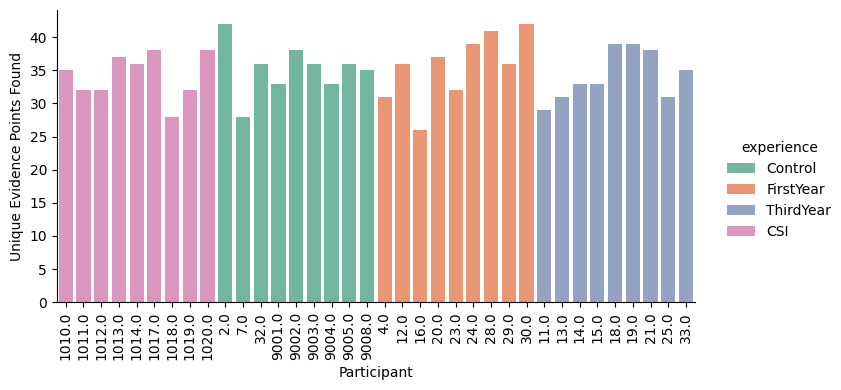

In [14]:
g = sns.catplot(
    data=evidence_count,
    kind='bar',
    x='Participant',
    y='unique_evidence_found',
    hue='experience',
    # row='Scene',
    # col='Image',
    palette='Set2',
    height=4,
    aspect=1.5
)

g.set_axis_labels("Participant", "Unique Evidence Points Found")
g.set_titles("Scene {row_name}, Image {col_name}")
g.set_xticklabels(rotation=90)

# Move legend outside
g._legend.set_bbox_to_anchor((1, 0.5))
g._legend.set_loc("center left")

plt.tight_layout()
plt.show()


In [15]:
# Filter only rows where the evidence was found
filtered = df[df['Evidence'] == 'Yes']

# Count unique evidence points ('Name') per participant, scene, and image
evidence_count_scene_image = (
    filtered.groupby(['Participant', 'Scene', 'Image', 'experience'])['Name'] #
    .nunique()
    .reset_index(name='unique_evidence_found')
)

# Sort participants by experience, then participant ID
sorted_ids = (
    evidence_count_scene_image
    .sort_values(['experience', 'Participant'])
    .drop_duplicates('Participant')['Participant']
    .tolist()
)

# Make Participant a categorical variable with the desired order
evidence_count_scene_image['Participant'] = pd.Categorical(
    evidence_count_scene_image['Participant'], categories=sorted_ids, ordered=True
)


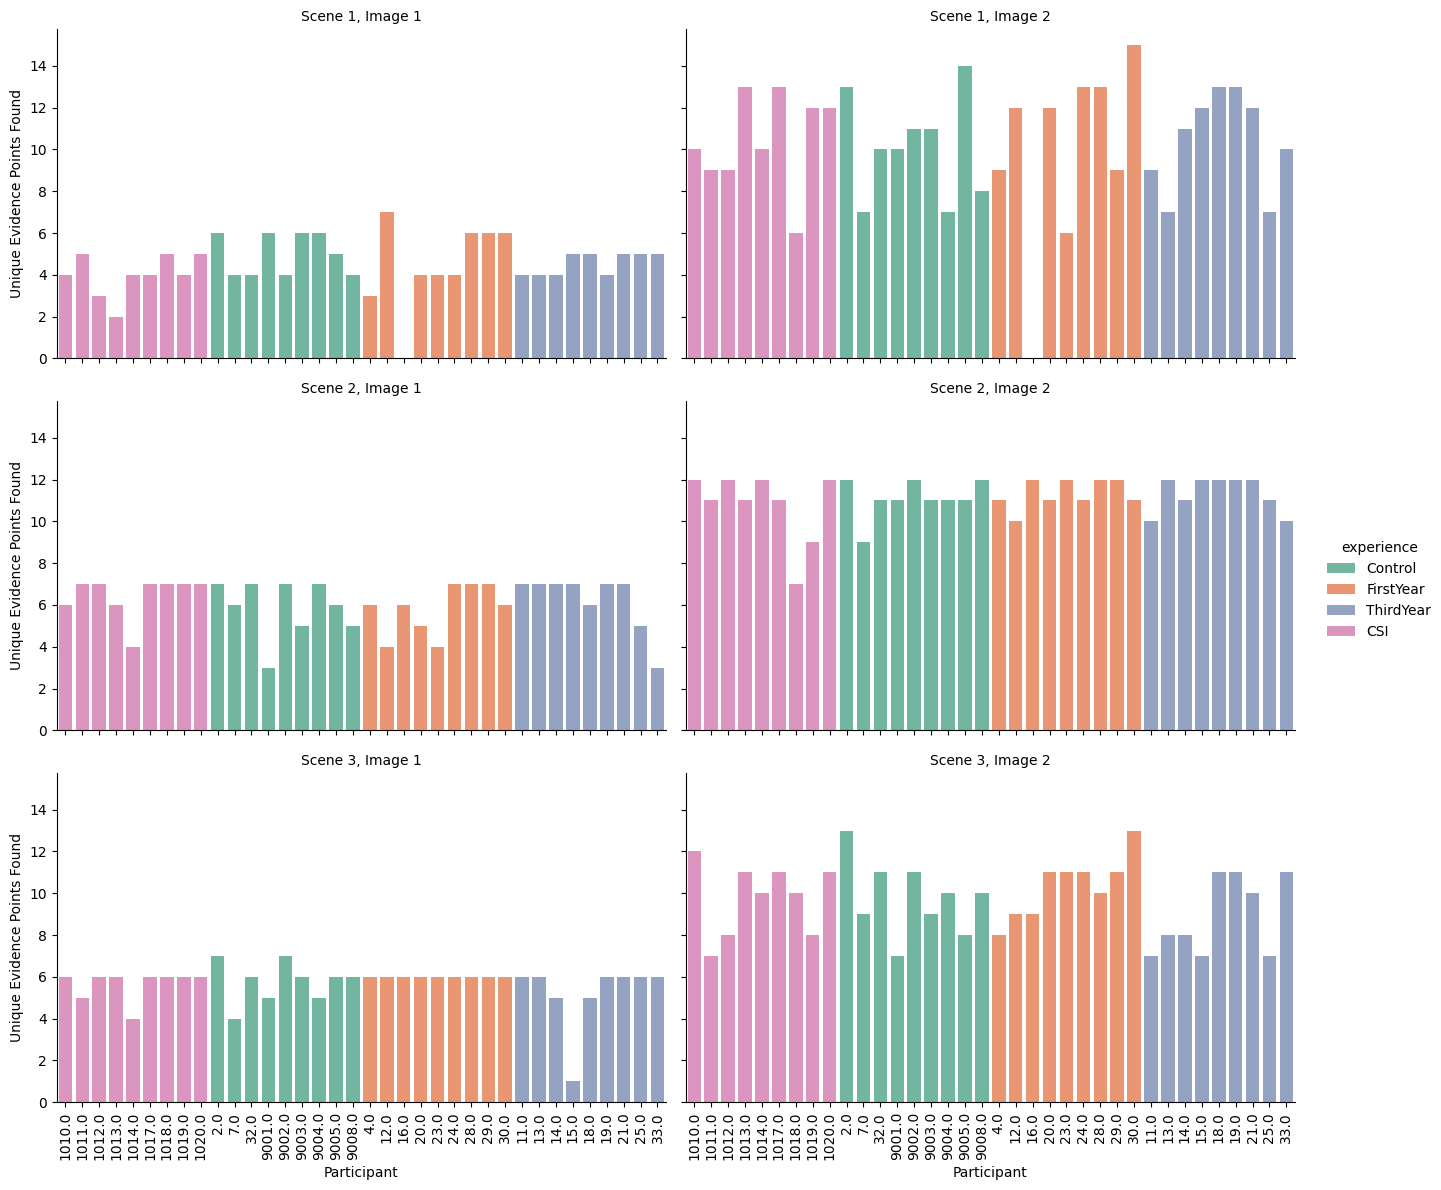

In [16]:
g = sns.catplot(
    data=evidence_count_scene_image,
    kind='bar',
    x='Participant',
    y='unique_evidence_found',
    hue='experience',
    row='Scene',
    col='Image',
    palette='Set2',
    height=4,
    aspect=1.5
)

g.set_axis_labels("Participant", "Unique Evidence Points Found")
g.set_titles("Scene {row_name}, Image {col_name}")

# Rotate and force all x-tick labels to show
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

# Move legend outside
g._legend.set_bbox_to_anchor((1, 0.5))
g._legend.set_loc("center left")

plt.tight_layout()
plt.show()


In [17]:
total_evidence_count_scene_image = (
    filtered.groupby(['Scene', 'Image'])['Name'] #
    .nunique()
    .reset_index(name='unique_evidence_found')
)

In [18]:
total_evidence_count_scene_image

,Scene,Image,unique_evidence_found
0,1,1,8
1,1,2,15
2,2,1,7
3,2,2,12
4,3,1,7
5,3,2,13


In [19]:
mean_evidence_count_scene_image = evidence_count_scene_image.groupby(['Scene', 'Image', 'experience'])['unique_evidence_found'].mean().reset_index(name='unique_evidence_found')

In [20]:
merged = mean_evidence_count_scene_image.merge(total_evidence_count_scene_image, left_on=['Scene', 'Image'], right_on=['Scene', 'Image'])

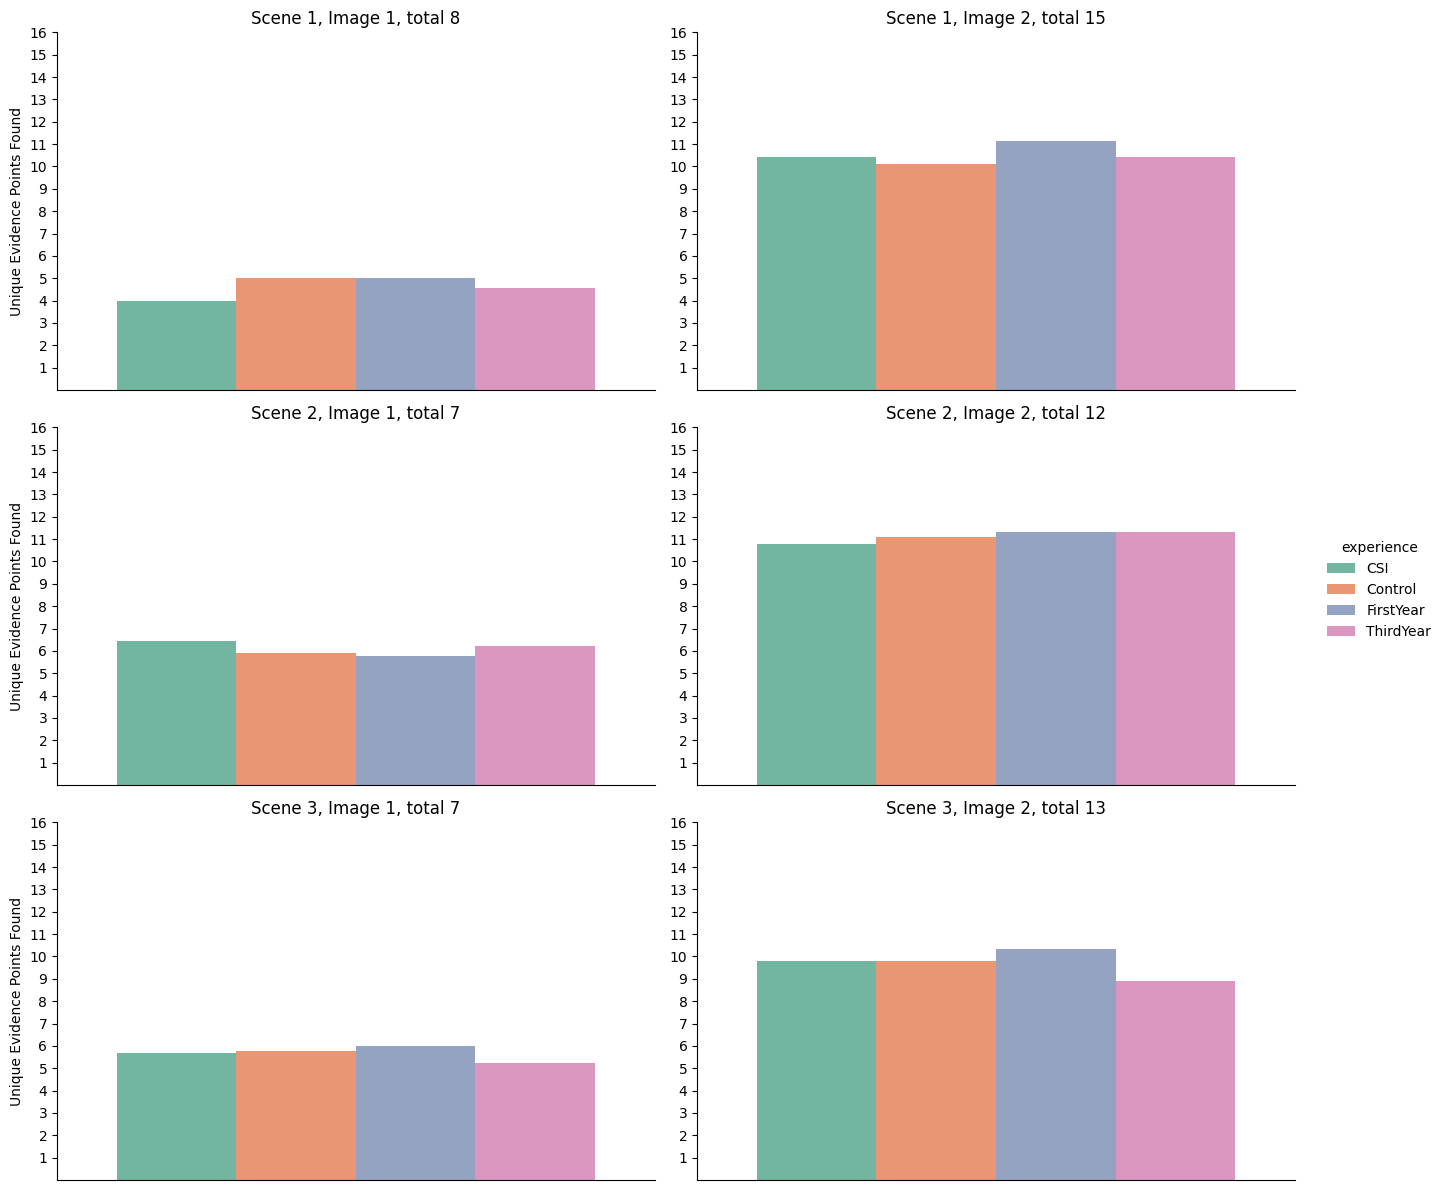

In [34]:
merged['Group'] = "All"  # or use a per-scene count if you want spacing

g = sns.catplot(
    data=merged,
    kind='bar',
    x='Group',                             # dummy x-axis to get just one bar group
    y='unique_evidence_found_x',
    hue='experience',                      # use experience as legend/color
    row='Scene',
    col='Image',
    palette='Set2',
    height=4,
    aspect=1.5
)


g.set_axis_labels("", "Unique Evidence Points Found")
g.set_titles("Scene {row_name}, Image {col_name}")
g.set(ylim=(0, 16), yticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 , 14, 15, 16])
g.set(xlabel='')
# Rotate x-tick labels
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)
    ax.tick_params(labelleft=True)
    ax.set_xticklabels([])
    ax.set_xticks([])

# Update titles with total evidence found
for (row_val, col_val), ax in g.axes_dict.items():
    total_match = total_evidence_count_scene_image[
        (total_evidence_count_scene_image['Scene'] == row_val) &
        (total_evidence_count_scene_image['Image'] == col_val)
    ]['unique_evidence_found'].values

    total_str = f"{total_match[0]}" if len(total_match) > 0 else "N/A"
    ax.set_title(f"Scene {row_val}, Image {col_val}, total {total_str}")
    
if g._legend:
    g._legend.set_bbox_to_anchor((1, 0.5))
    g._legend.set_loc("center left")


plt.tight_layout()
plt.show()


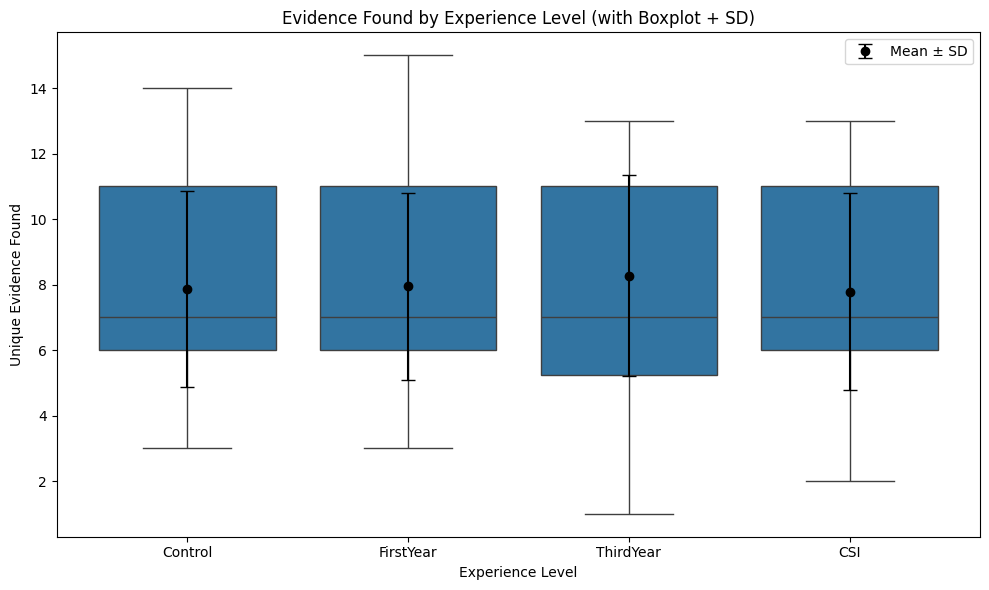

In [43]:
plt.figure(figsize=(10, 6))

# Boxplot: shows variation (IQR, whiskers, outliers)
sns.boxplot(
    data=evidence_count_scene_image,
    x='experience',
    y='unique_evidence_found',
    showcaps=True,
    showfliers=True
)

# Optional: Overlay mean and standard deviation
# Calculate per-experience stats
stats = evidence_count_scene_image.groupby("experience")["unique_evidence_found"].agg(['mean', 'std']).reset_index()

# Add mean with error bars (standard deviation)
for i, row in stats.iterrows():
    plt.errorbar(
        x=i,
        y=row['mean'],
        yerr=row['std'],
        fmt='o',
        color='black',
        capsize=5,
        label='Mean ± SD' if i == 0 else "",  # only label once for legend
        zorder=5
    )

plt.ylabel("Unique Evidence Found")
plt.xlabel("Experience Level")
plt.title("Evidence Found by Experience Level (with Boxplot + SD)")
plt.legend()
plt.tight_layout()
plt.show()